In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Membaca data Image
images = [
    "../img/kucing.jpg",
    "../img/gradient.png",
    "../img/Penguins.jpg",
    "../img/arizona.jpg",
    "../img/Tulips.jpg",
    "../img/Koala.jpg",
    "../img/plant-photography.jpg",
]

# Set up the subplot grid
rows = len(images)
cols = 4

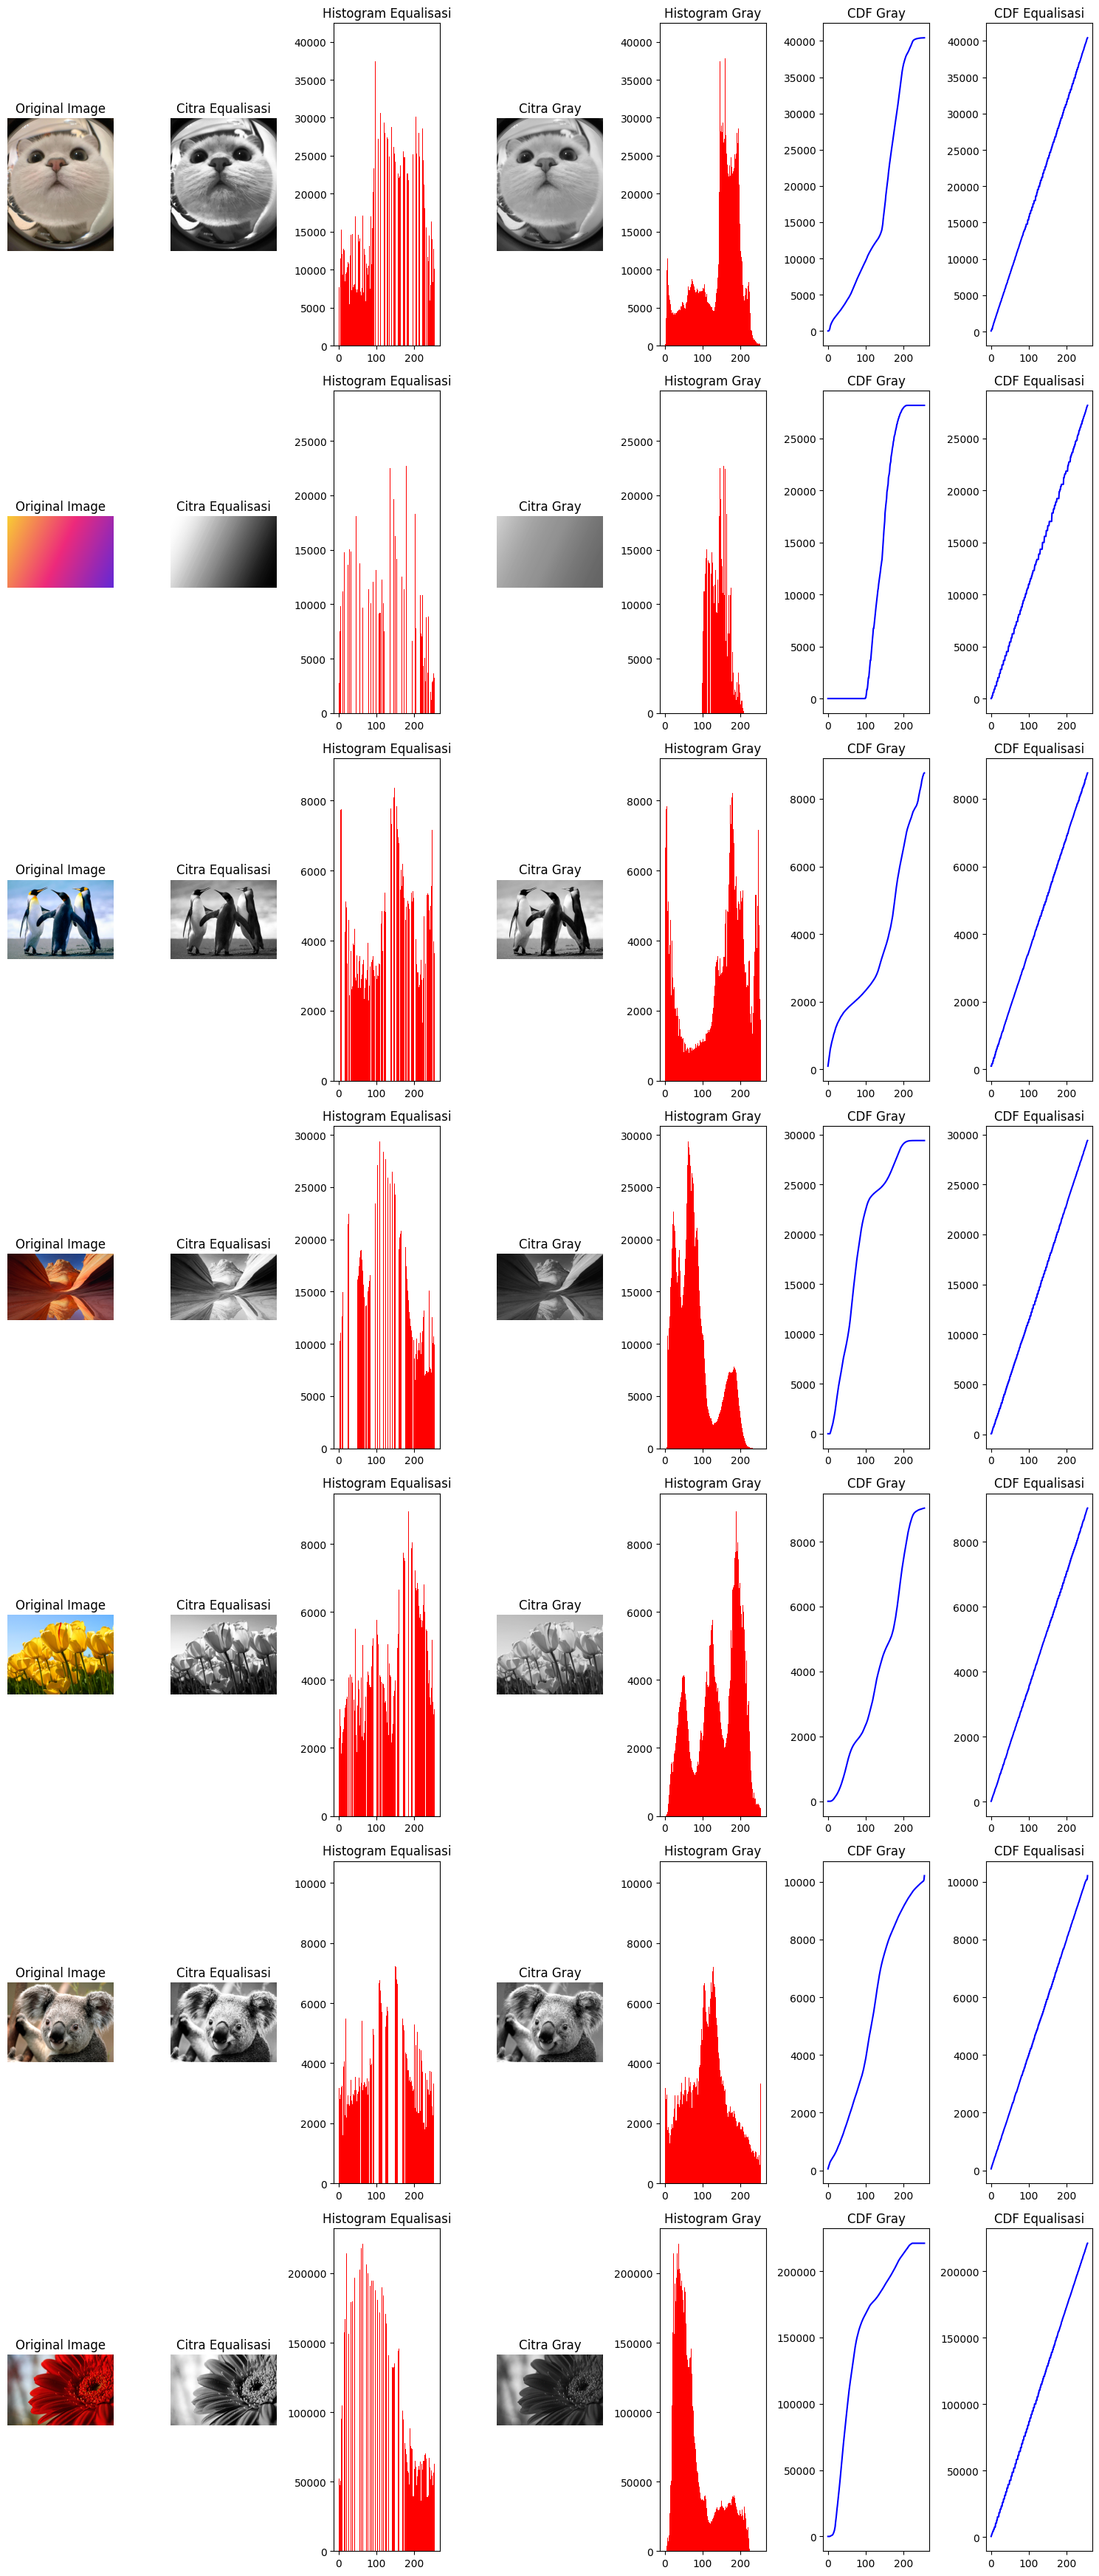

In [6]:
# ==============================
# Histogram Ekualisasi
# ==============================
# Create a subplot for each image
fig, axes = plt.subplots(rows, 7, figsize=(15, 5 * rows))

# Loop through each image
for i, imgFilename in enumerate(images):
    # Membaca data Image
    oriImg = cv2.imread(imgFilename)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Membaca data Image
    img = cv2.imread(imgFilename, 0)

    # Histogram Equalization
    img1 = cv2.equalizeHist(img)

    titles = [
        "Citra Gray",
        "Citra Equalisasi",
        "Histogram Gray",
        "Histogram Equalisasi",
        "CDF Gray",
        "CDF Equalisasi",
    ]

    # Display histogram equalized image and its histogram
    axes[i, 1].imshow(img1, cmap="gray", vmin=0, vmax=255)
    axes[i, 1].set_title(titles[1])
    axes[i, 1].axis("off")

    axes[i, 2].hist(img1.flatten(), 256, [0, 256], color="r")
    axes[i, 2].set_title(titles[3])

    # Display original grayscale image and its histogram
    axes[i, 3].imshow(img, cmap="gray", vmin=0, vmax=255)
    axes[i, 3].set_title(titles[0])
    axes[i, 3].axis("off")

    axes[i, 4].hist(img.flatten(), 256, [0, 256], color="r")
    axes[i, 4].set_title(titles[2])

    # Display CDF
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    axes[i, 5].plot(cdf_normalized, color="b")
    axes[i, 5].set_title(titles[4])

    # Display CDF for equalized image
    hist2, bins = np.histogram(img1.flatten(), 256, [0, 256])
    cdf2 = hist2.cumsum()
    cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()
    axes[i, 6].plot(cdf_normalized2, color="b")
    axes[i, 6].set_title(titles[5])

# Show the plot
plt.tight_layout()
plt.show()